Это пример генерации большого control set из многих примитивов.

In [49]:
import matplotlib.pyplot as plt
from create_prims_file import save_and_show
from trajectory_optimization import optimization_Newton 
import sys
sys.path.append("../common/")
from KC_structs import *
from KC_graphics import *
%matplotlib inline  

In [50]:
theta_16 = Theta()
primitives_file = "big_control_set.txt"

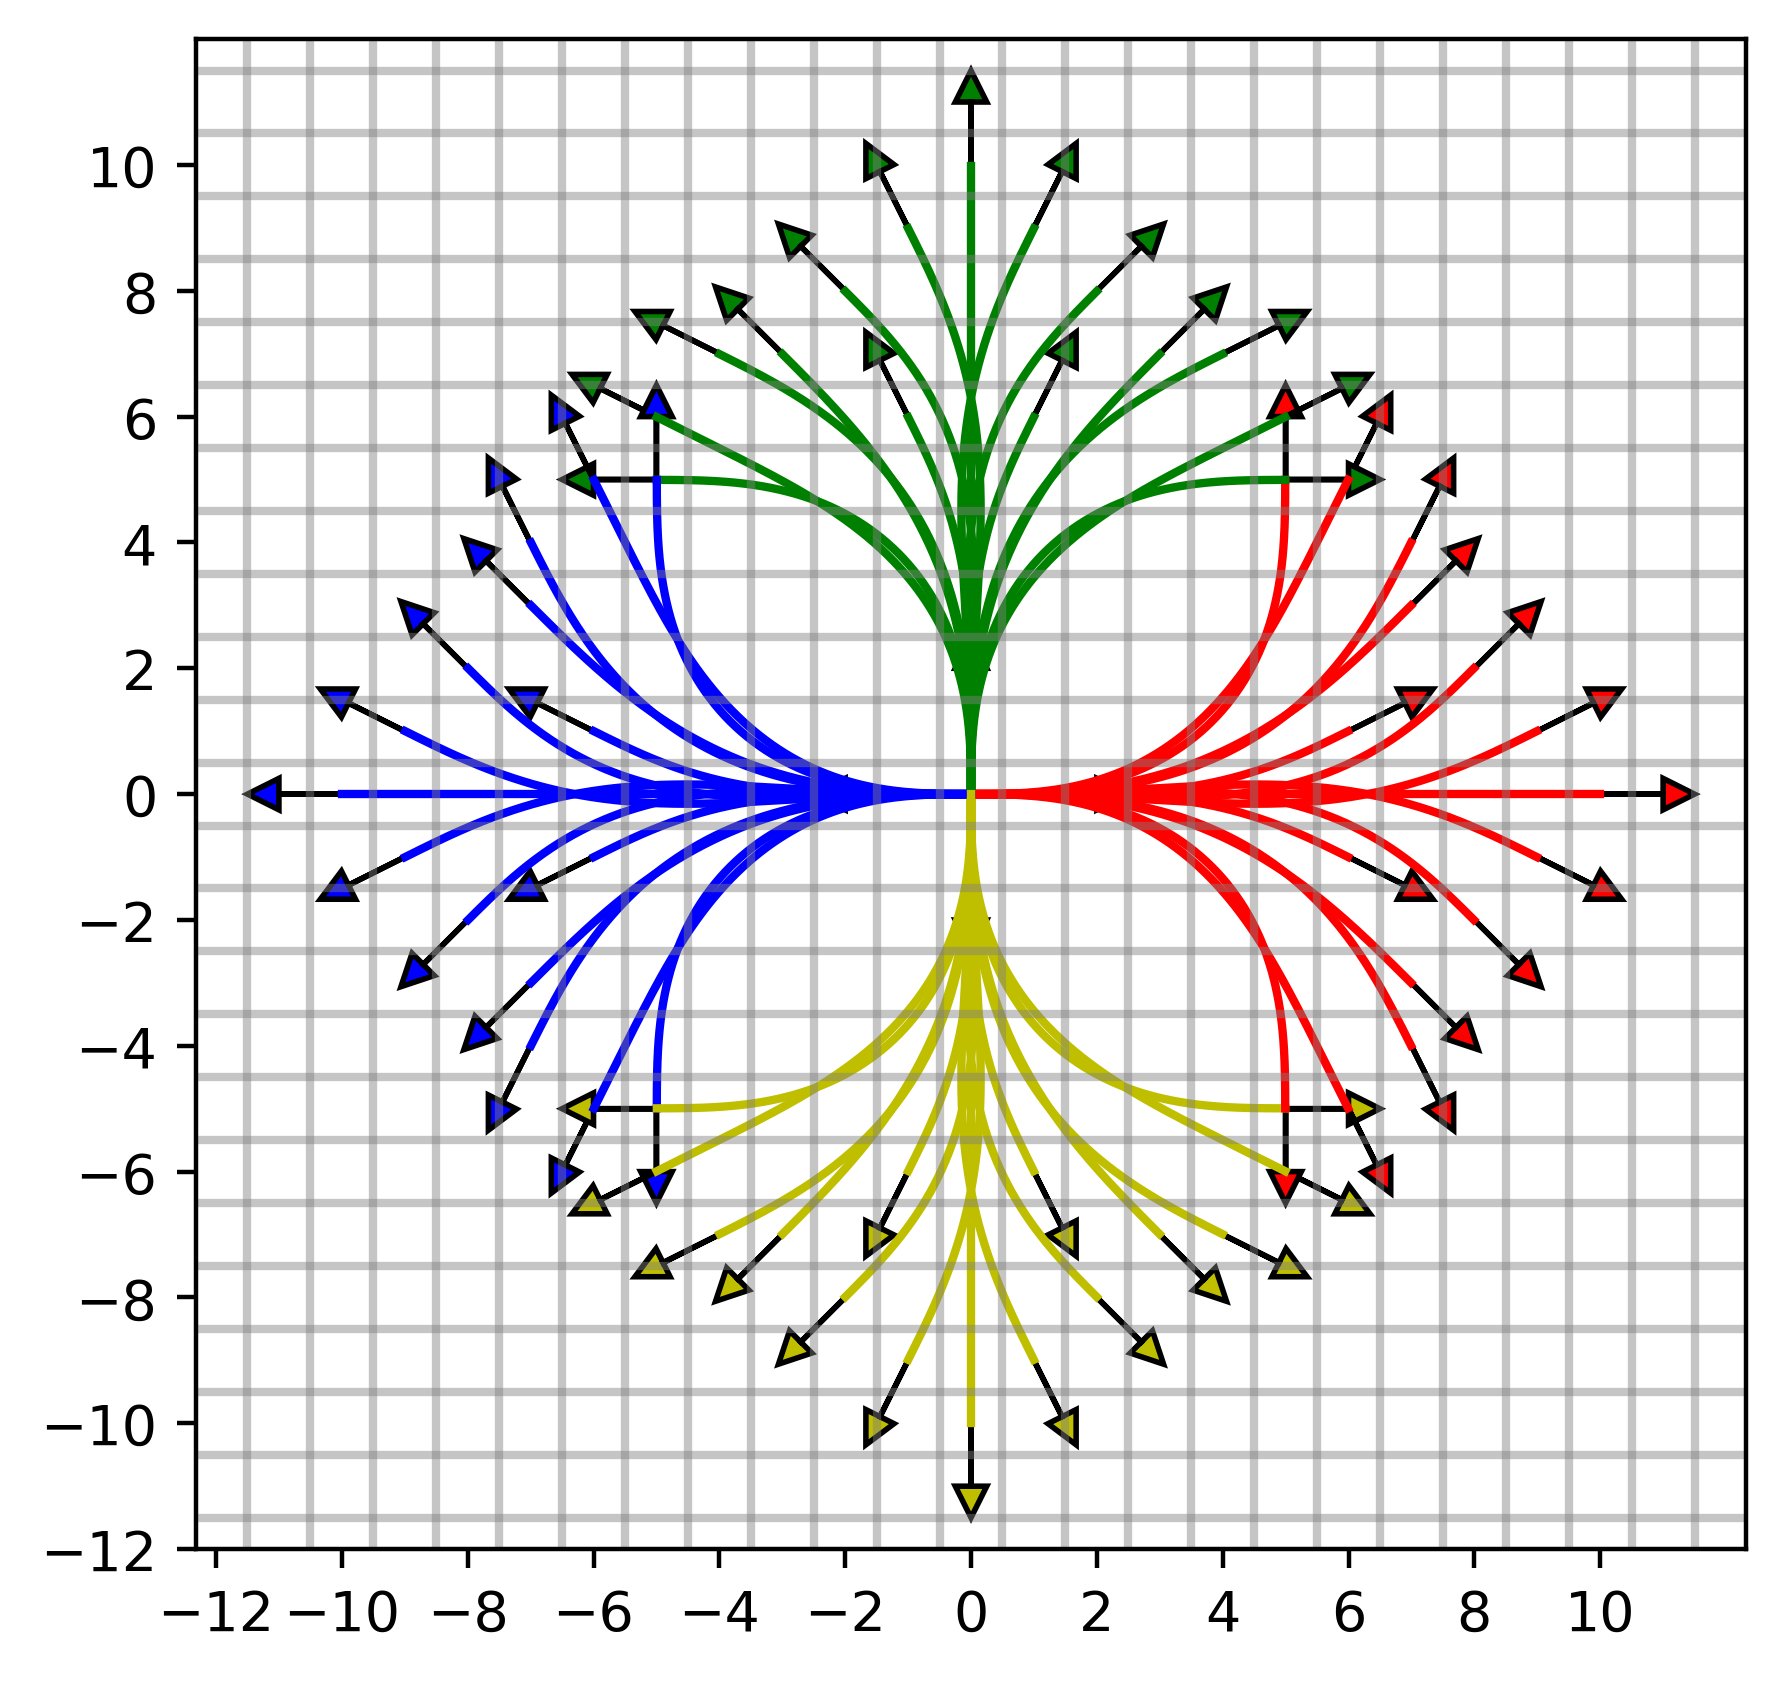

In [51]:
start = State(x=0, y=0, theta=theta_16[0])

fig = plt.figure(figsize=(5, 5), dpi=400) 
ax = fig.add_subplot(111)

for target in [State(x=10.0, y=0.0, theta=theta_16[0]),  
               State(x=1.0, y=0.0, theta=theta_16[0]),
               
               State(x=5.0, y=5.0, theta=theta_16[4]),
               State(x=9.0, y=1.0, theta=theta_16[1]),
               State(x=8.0, y=2.0, theta=theta_16[2]),
               State(x=6.0, y=5.0, theta=theta_16[3]),
               State(x=7.0, y=4.0, theta=theta_16[3]),
               State(x=6.0, y=1.0, theta=theta_16[1]),
               State(x=7.0, y=3.0, theta=theta_16[2]),

               State(x=5.0, y=-5.0, theta=theta_16[-4]),
               State(x=9.0, y=-1.0, theta=theta_16[-1]),
               State(x=8.0, y=-2.0, theta=theta_16[-2]),
               State(x=6.0, y=-5.0, theta=theta_16[-3]),
               State(x=7.0, y=-4.0, theta=theta_16[-3]),
               State(x=6.0, y=-1.0, theta=theta_16[-1]),
               State(x=7.0, y=-3.0, theta=theta_16[-2]),]:
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

draw_grid(ax, xs=-12, ys=-12, xf=12, yf=12, tick_step=2)
plt.show()

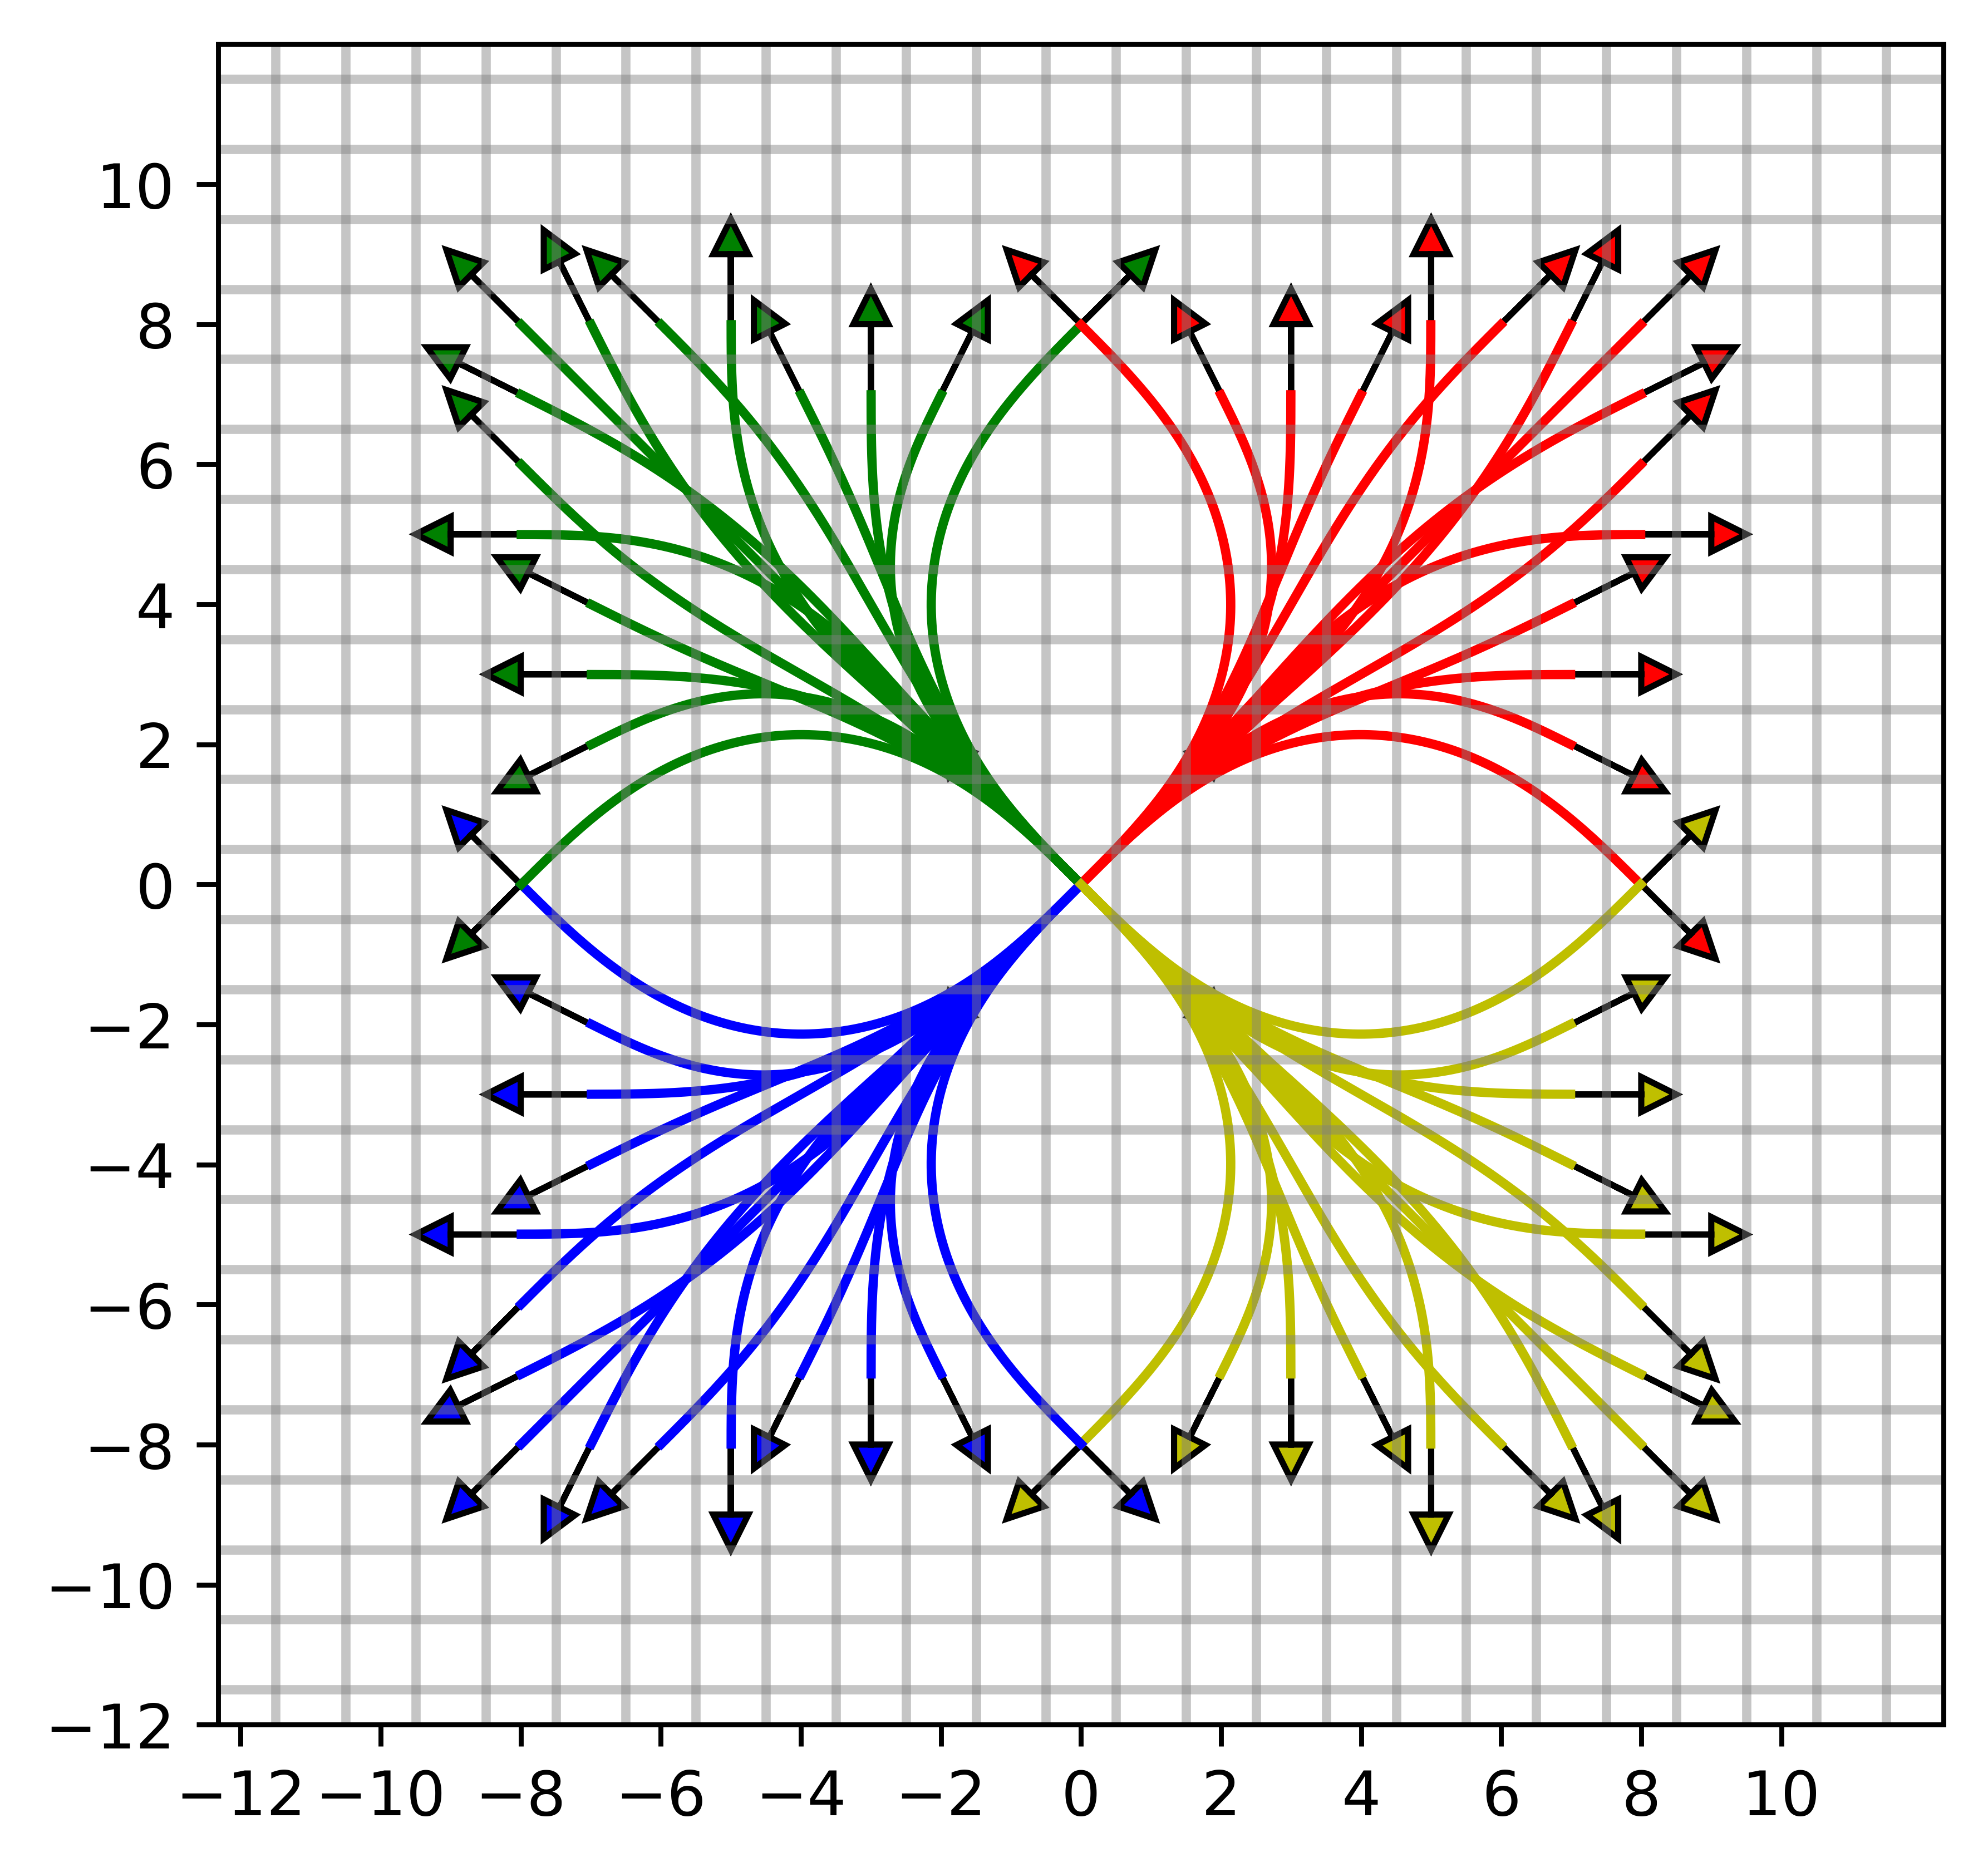

In [52]:
start = State(x=0, y=0, theta=theta_16[2])  # для угла 2

fig = plt.figure(figsize=(5, 5), dpi=800)
ax = fig.add_subplot(111)

for target in [State(x=8.0, y=8.0, theta=theta_16[2]),
               State(x=1.0, y=1.0, theta=theta_16[2]),
               
               State(x=8.0, y=0.0, theta=theta_16[-2]),
               State(x=8.0, y=7.0, theta=theta_16[1]),
               State(x=7.0, y=3.0, theta=theta_16[0]),
               State(x=7.0, y=2.0, theta=theta_16[-1]),
               State(x=8.0, y=5.0, theta=theta_16[0]),
               State(x=7.0, y=4.0, theta=theta_16[1]),
               State(x=8.0, y=6.0, theta=theta_16[2]),  # добавляем примитив, который не меняет направления, а позволяет агенту свдинуться вбок

               State(x=0.0, y=8.0, theta=theta_16[6]),
               State(x=7.0, y=8.0, theta=theta_16[3]),
               State(x=3.0, y=7.0, theta=theta_16[4]),
               State(x=2.0, y=7.0, theta=theta_16[5]),
               State(x=5.0, y=8.0, theta=theta_16[4]),
               State(x=4.0, y=7.0, theta=theta_16[3]),
               State(x=6.0, y=8.0, theta=theta_16[2]),
]:
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)

draw_grid(ax, xs=-12, ys=-12, xf=12, yf=12, tick_step=2)
plt.show()

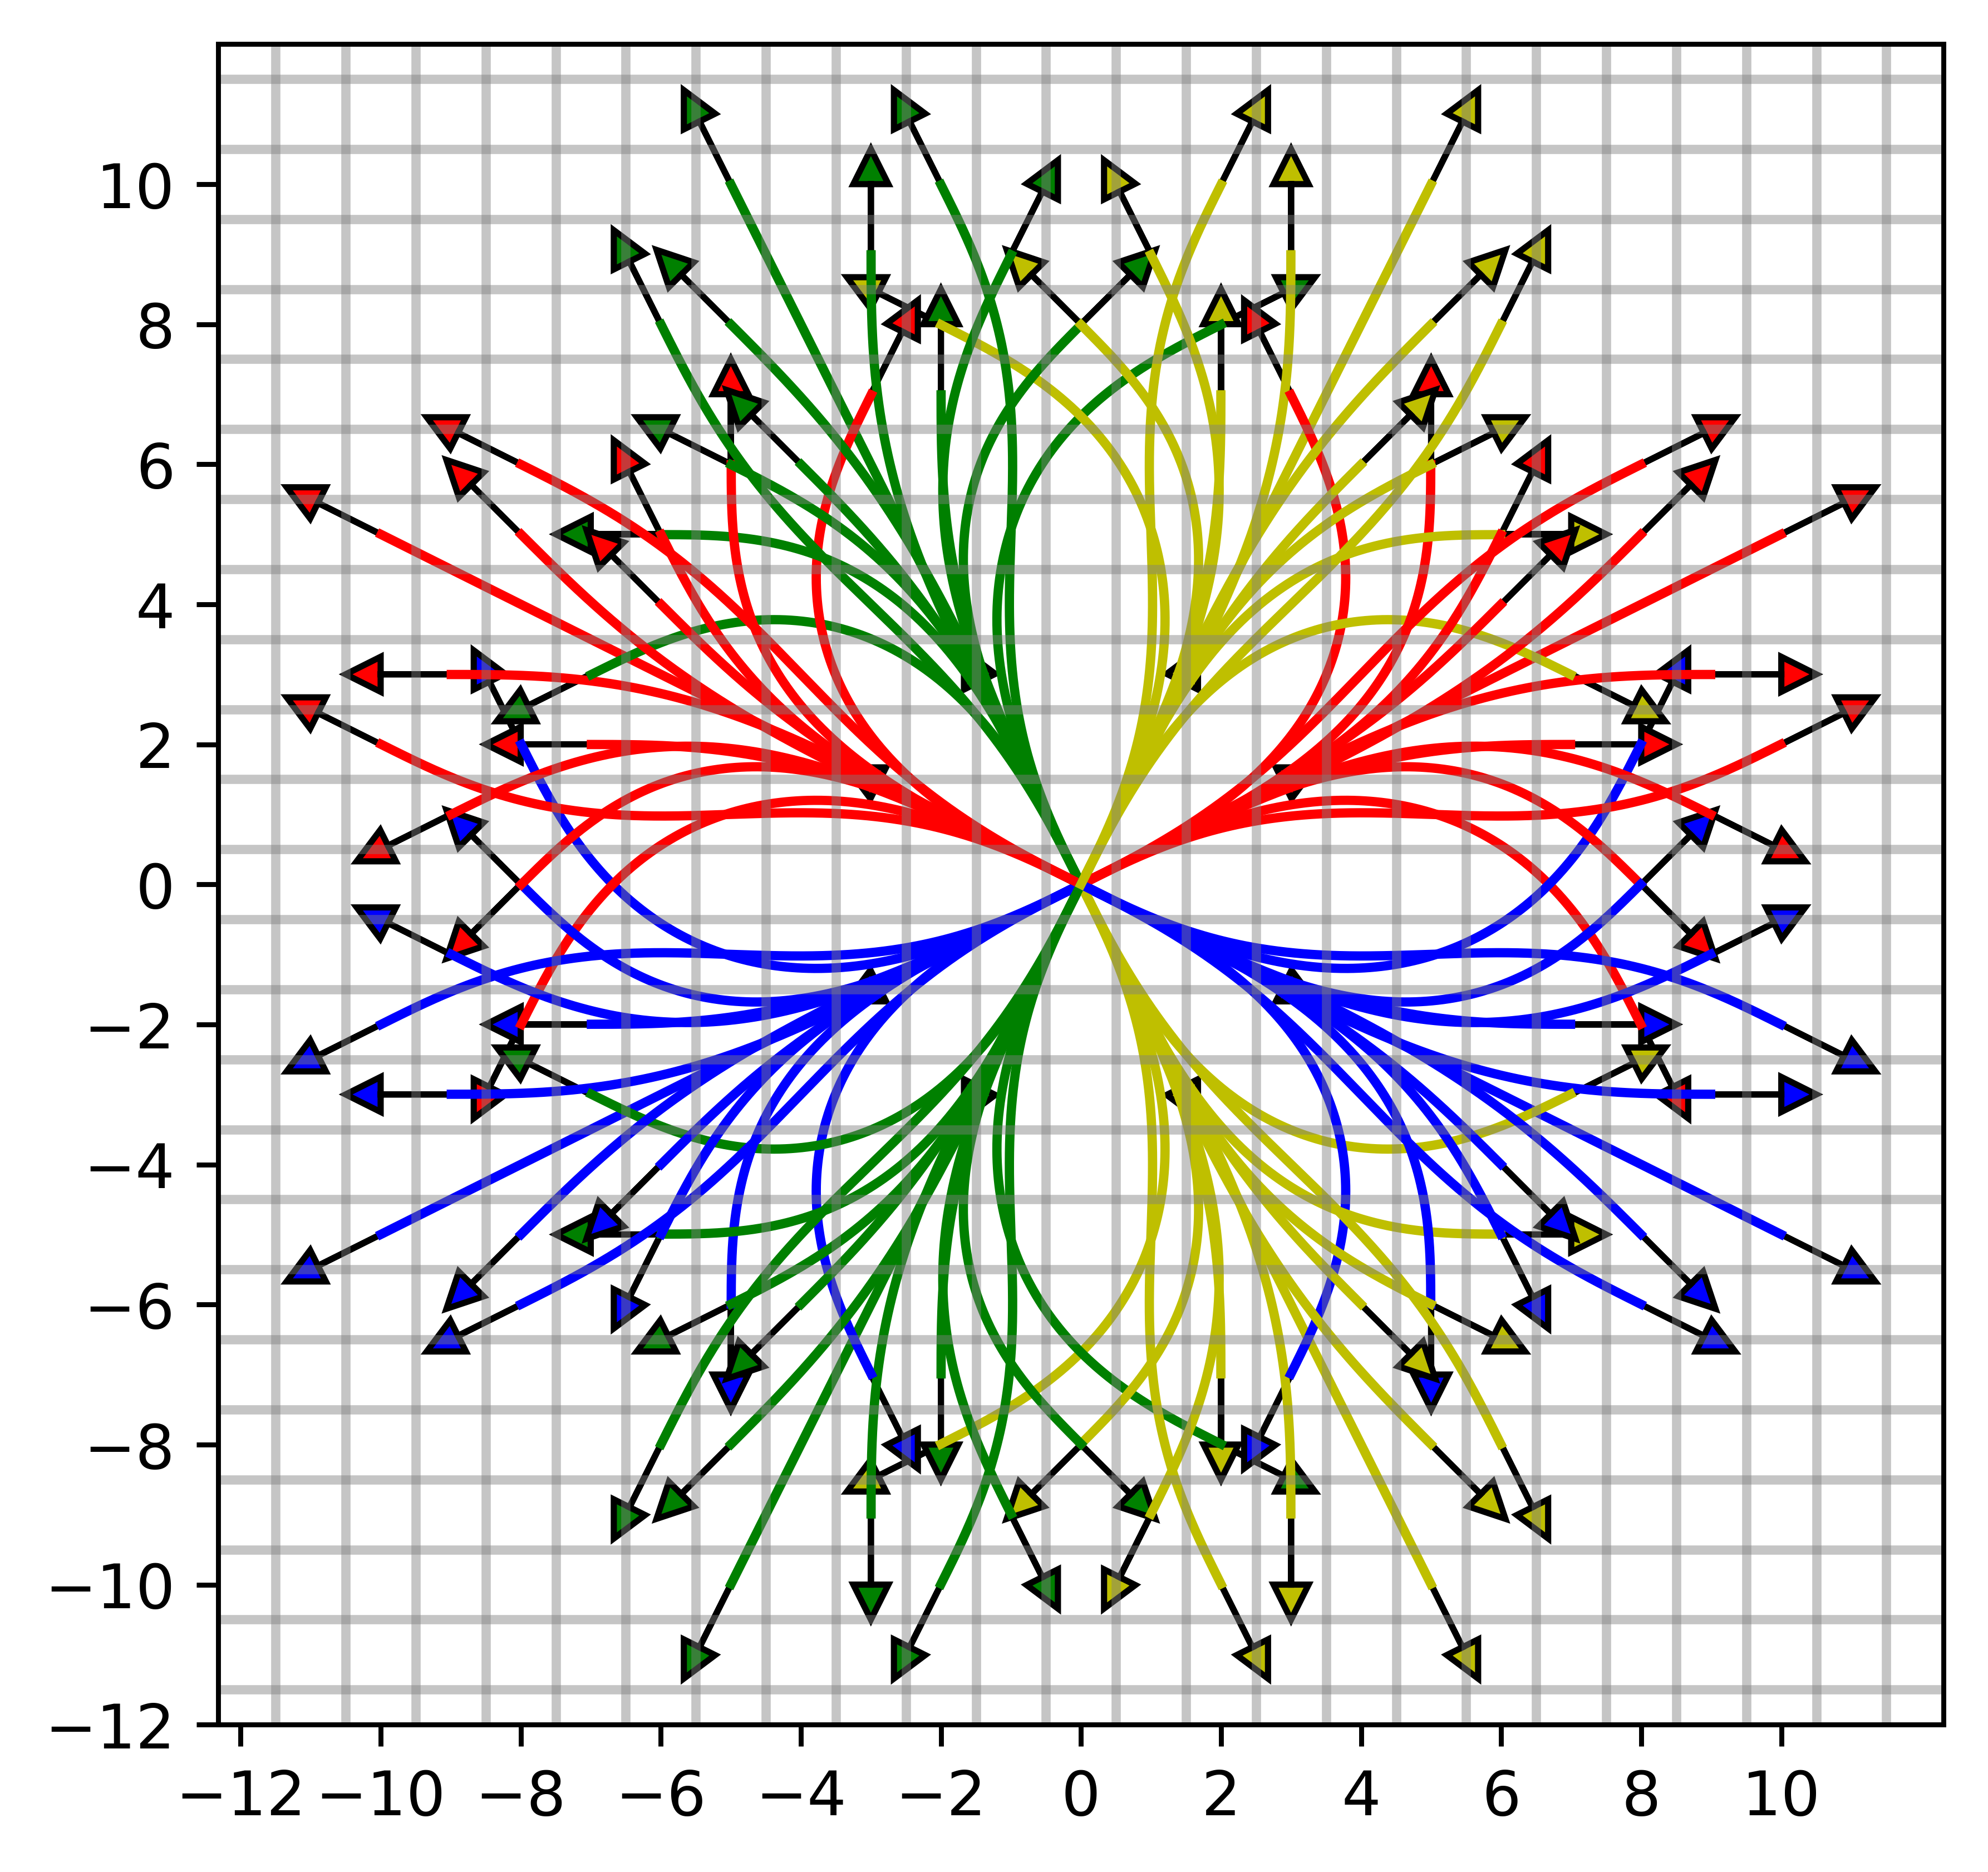

In [53]:
start = State(x=0, y=0, theta=theta_16[1])  # фиксируем дискретное направление = arctan(1/2)

fig = plt.figure(figsize=(5, 5), dpi=800)
ax = fig.add_subplot(111)

for target in [State(x=10.0, y=5.0, theta=theta_16[1]),  # перебираем конечные дискретные состояния
               State(x=2.0, y=1.0, theta=theta_16[1]),
               
               State(x=8.0, y=-2.0, theta=theta_16[-3]),
               State(x=10.0, y=2.0, theta=theta_16[1]),
               State(x=9.0, y=3.0, theta=theta_16[0]),
               State(x=8.0, y=0.0, theta=theta_16[-2]),
               State(x=7.0, y=2.0, theta=theta_16[0]),
               State(x=9.0, y=1.0, theta=theta_16[-1]),

               State(x=3.0, y=7.0, theta=theta_16[5]),
               State(x=5.0, y=6.0, theta=theta_16[4]),
               State(x=6.0, y=5.0, theta=theta_16[3]),
               State(x=6.0, y=4.0, theta=theta_16[2]),
               State(x=8.0, y=5.0, theta=theta_16[2]),
               State(x=8.0, y=6.0, theta=theta_16[1]),  # x=7.0, y=7.0 
              ]:
    
    prim = optimization_Newton(start=start, goal=target, show_animation=False)
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)  # удобно использовать , central_sym=False в процессе подбора примитивов, которые в control set включить

    # отражаем и сохраняем
    prim.start = State(prim.start.x, prim.start.y, theta_16[7], -prim.k0)  
    prim.goal = State(-prim.goal.x, prim.goal.y, theta_16[7] - (prim.goal.theta - theta_16[1]))  
    prim.set_coef_params(-prim.a, -prim.b, -prim.c, prim.length)  
    save_and_show(file=primitives_file, prim=prim, ax=ax, theta_discrete=theta_16)


draw_grid(ax, xs=-12, ys=-12, xf=12, yf=12, tick_step=2)
plt.show()